Shape: (4601, 58)
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...          

/tmp/ipython-input-3626160198.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


 Best Params: {'C': 10, 'kernel': 'linear'}

--- Linear SVM - Train ---
Accuracy : 0.9350931677018633
Precision: 0.9349582943149307
Recall   : 0.9350931677018633
F1 Score : 0.9349217423551639


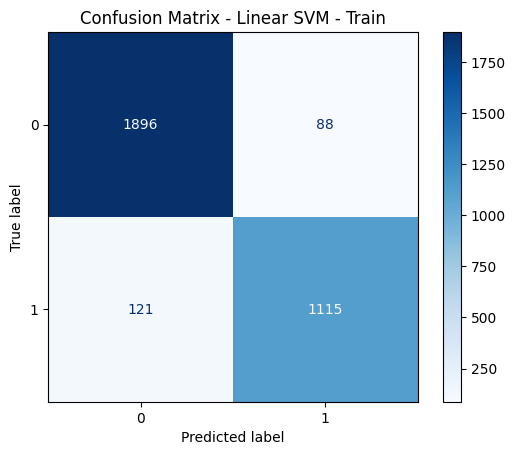

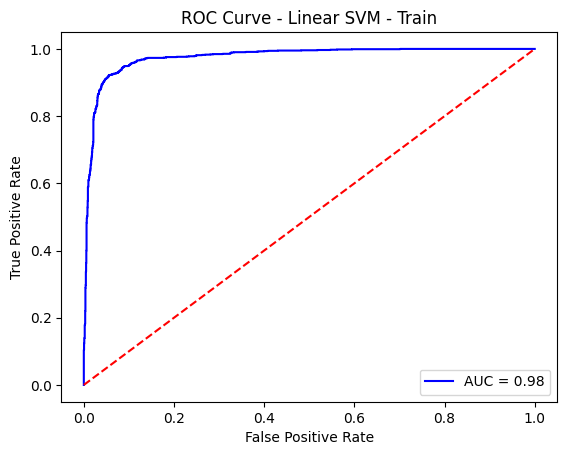


--- Linear SVM - Validation ---
Accuracy : 0.9217391304347826
Precision: 0.9220926710795753
Recall   : 0.9217391304347826
F1 Score : 0.9214021183294496


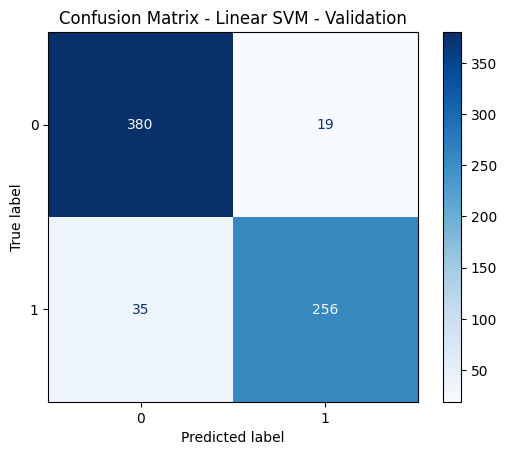

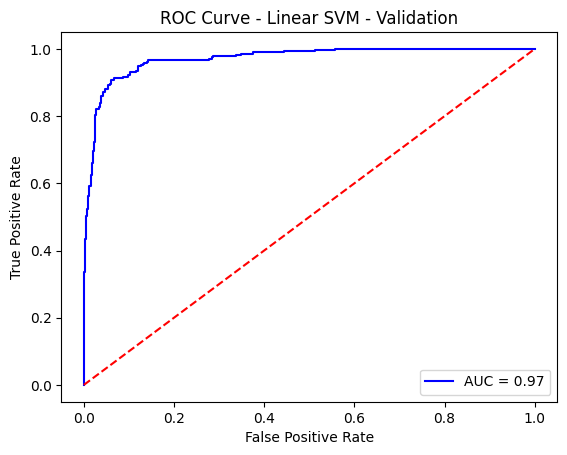


--- Linear SVM - Test ---
Accuracy : 0.9363241678726484
Precision: 0.9362533008439123
Recall   : 0.9363241678726484
F1 Score : 0.9362564088721321


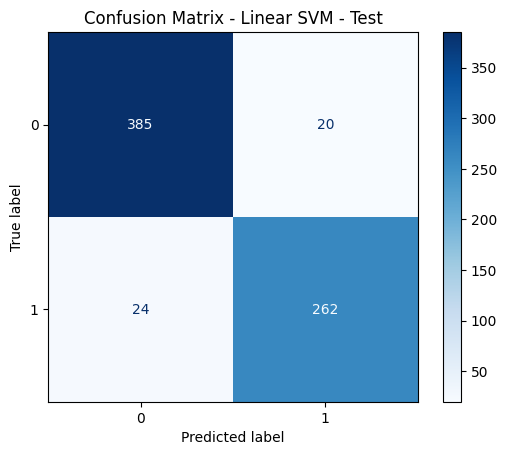

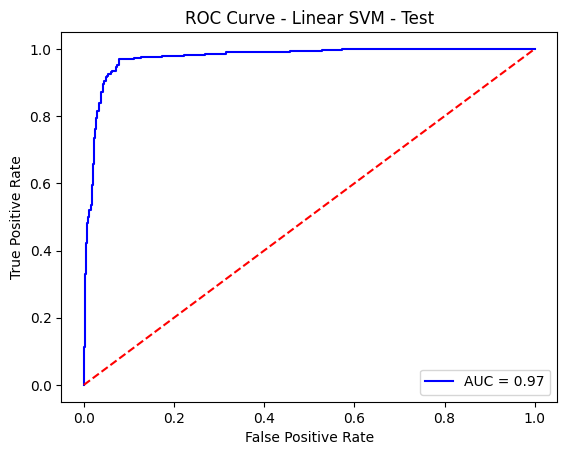


===== Polynomial SVM =====
 Best Params: {'C': 10, 'degree': 2, 'kernel': 'poly'}

--- Polynomial SVM - Train ---
Accuracy : 0.9487577639751553
Precision: 0.9496975917735738
Recall   : 0.9487577639751553
F1 Score : 0.9483328478148557


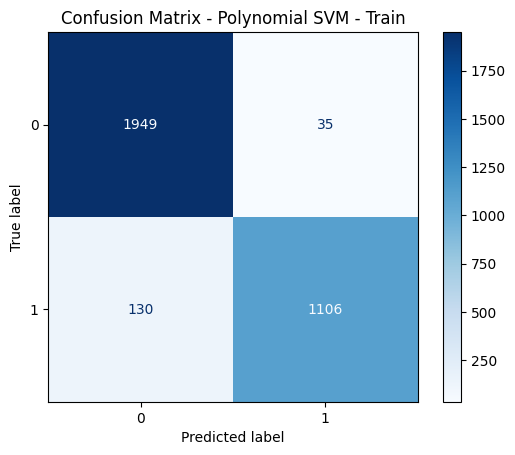

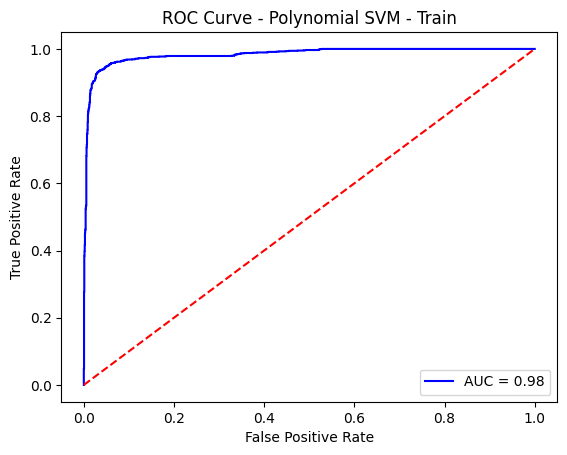


--- Polynomial SVM - Validation ---
Accuracy : 0.9188405797101449
Precision: 0.9200453642013162
Recall   : 0.9188405797101449
F1 Score : 0.9182800248882701


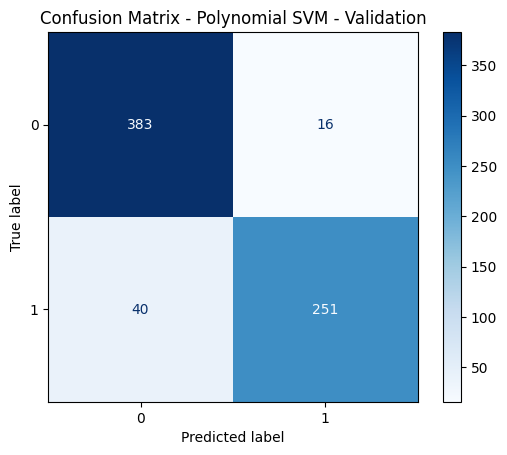

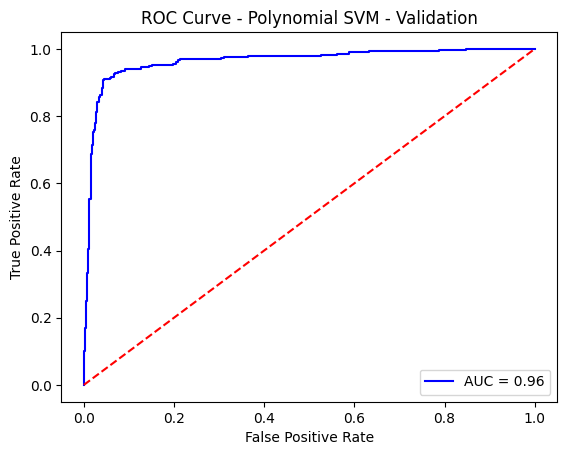


--- Polynomial SVM - Test ---
Accuracy : 0.9232995658465991
Precision: 0.9241042245060346
Recall   : 0.9232995658465991
F1 Score : 0.9228070813879494


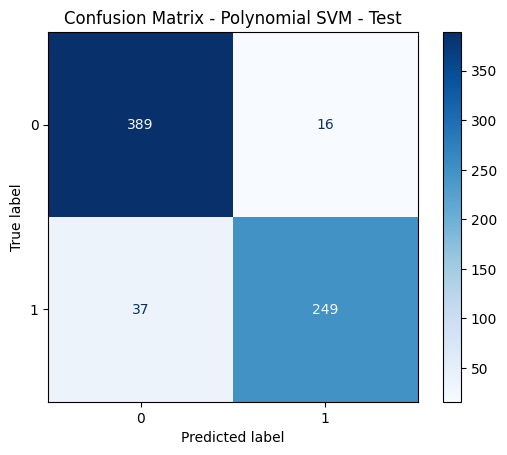

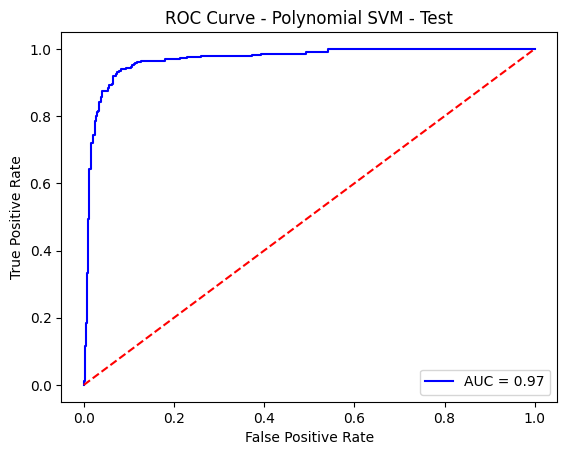


===== RBF SVM =====
 Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

--- RBF SVM - Train ---
Accuracy : 0.9419254658385093
Precision: 0.9419241352781945
Recall   : 0.9419254658385093
F1 Score : 0.9416924502958565


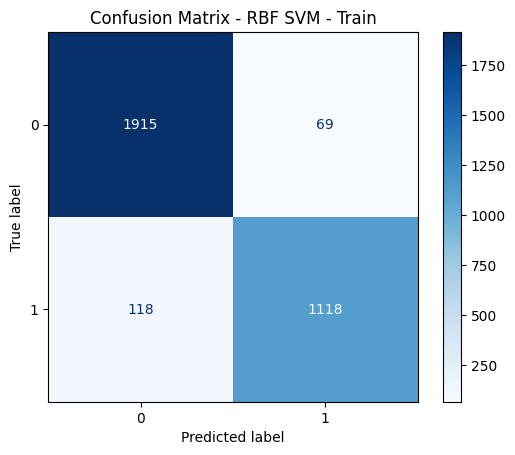

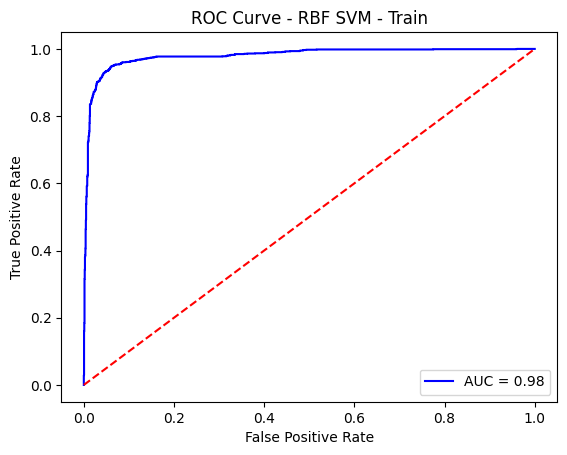


--- RBF SVM - Validation ---
Accuracy : 0.9304347826086956
Precision: 0.9308736606505071
Recall   : 0.9304347826086956
F1 Score : 0.930135216292844


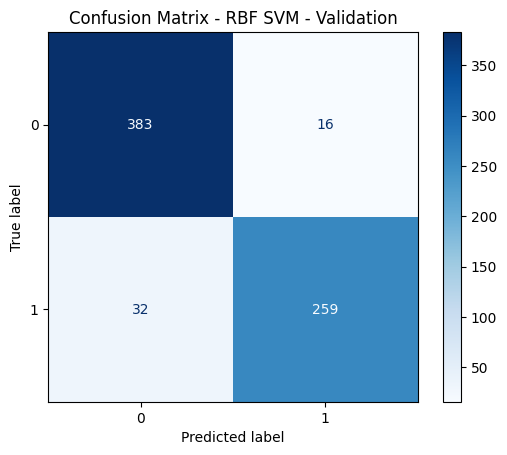

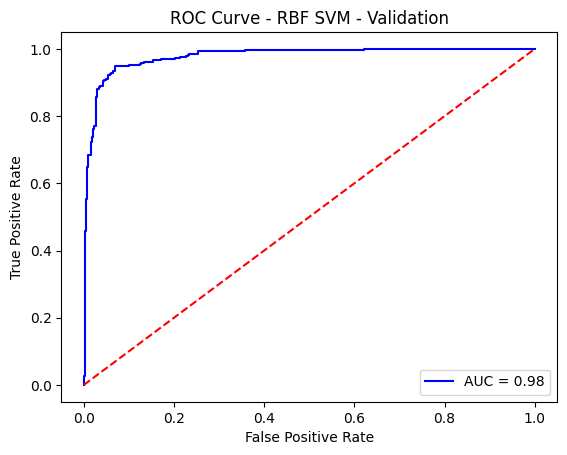


--- RBF SVM - Test ---
Accuracy : 0.9435600578871202
Precision: 0.9441863890000909
Recall   : 0.9435600578871202
F1 Score : 0.9432757585175002


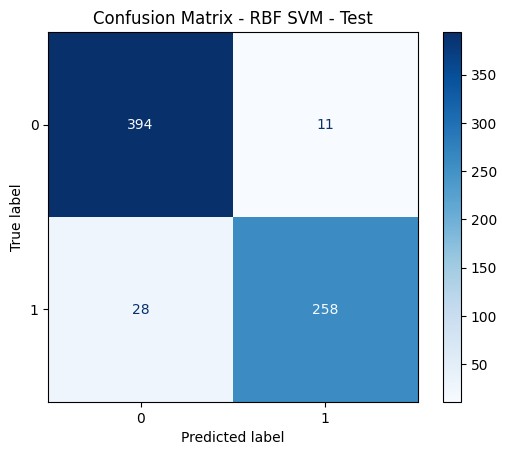

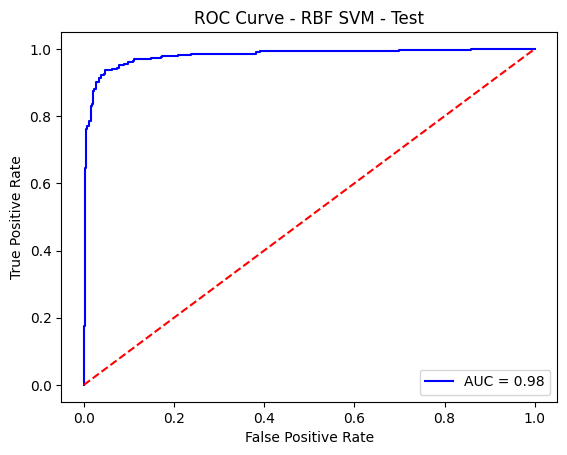


===== Sigmoid SVM =====
 Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

--- Sigmoid SVM - Train ---
Accuracy : 0.8944099378881988
Precision: 0.8951769668851488
Recall   : 0.8944099378881988
F1 Score : 0.8931087013008939


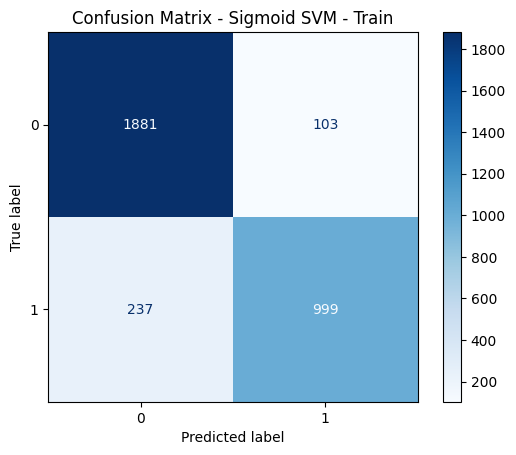

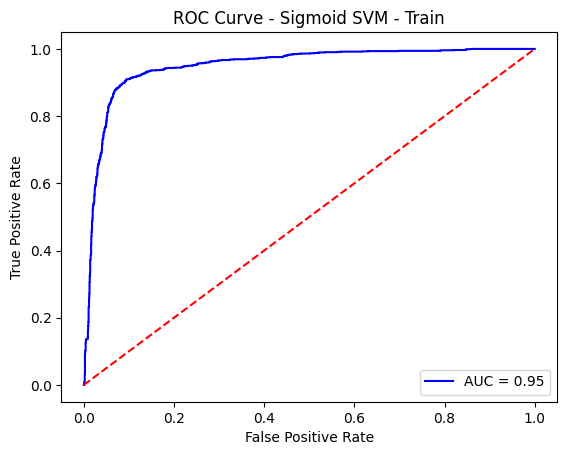


--- Sigmoid SVM - Validation ---
Accuracy : 0.881159420289855
Precision: 0.8848279245345774
Recall   : 0.881159420289855
F1 Score : 0.8795088566827697


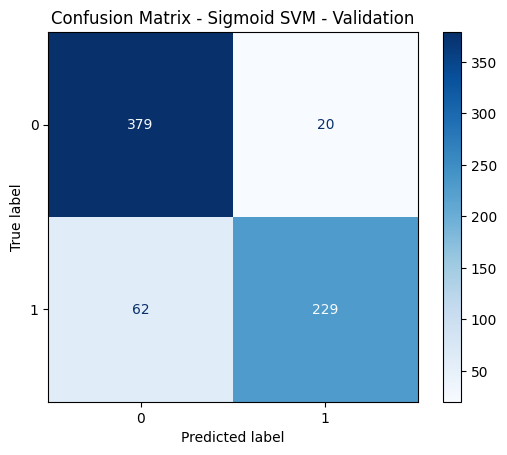

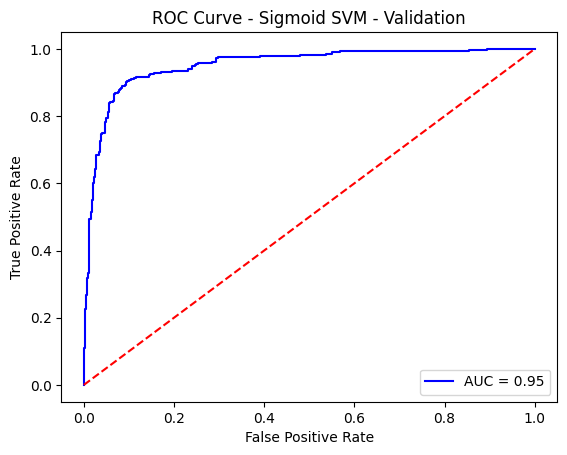


--- Sigmoid SVM - Test ---
Accuracy : 0.894356005788712
Precision: 0.8951519343481761
Recall   : 0.894356005788712
F1 Score : 0.893523334650198


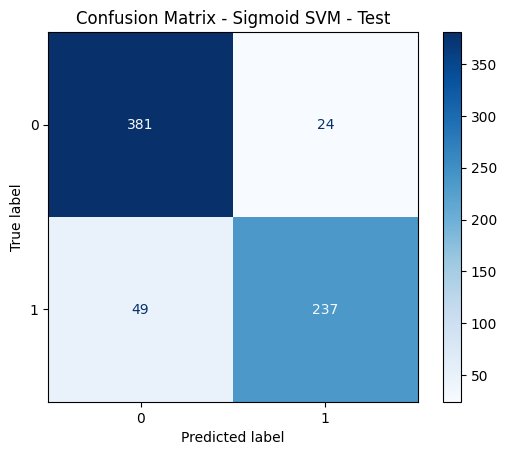

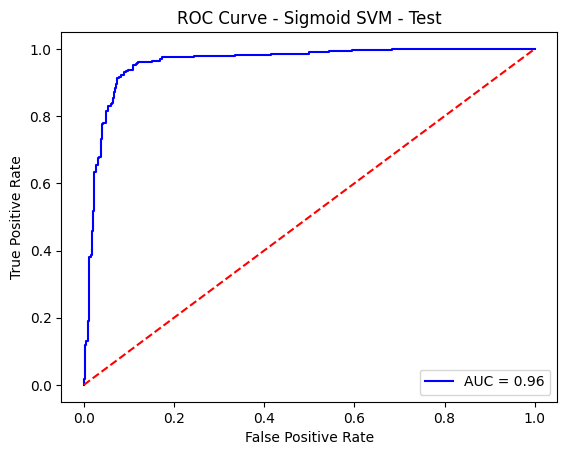

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
from sklearn.svm import SVC


# =============================
# Load dataset
# =============================
df = pd.read_csv("/content/spambase_csv.csv")
print("Shape:", df.shape)
print(df.head())


# =============================
# Preprocessing
# =============================
# Fill missing values
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].mean(), inplace=True)

# Encode binary categorical
label_encoder = LabelEncoder()
binary_cols = [col for col in df.select_dtypes(include='object') if df[col].nunique() == 2]
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-hot encode multi-class categorical
multi_cols = [col for col in df.select_dtypes(include='object') if col not in binary_cols]
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

# Split features and target
target_col = "class"
X = df.drop(target_col, axis=1)
y = df[target_col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-val-test split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)


# =============================
# Evaluation function
# =============================
def evaluate_classifier(model, X_data, y_true, name="Set"):
    y_pred = model.predict(X_data)

    print(f"\n--- {name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_true, y_pred, average='weighted'))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC & AUC (works only for binary classification)
    if len(np.unique(y_true)) == 2:
        y_score = model.decision_function(X_data)
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], color="red", linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()


# =============================
# Grid Search for SVM Variants
# =============================
svm_variants = {
    "Linear SVM": {"kernel": ["linear"], "C": [0.1, 1, 10]},
    "Polynomial SVM": {"kernel": ["poly"], "C": [0.1, 1, 10], "degree": [2, 3, 4]},
    "RBF SVM": {"kernel": ["rbf"], "C": [0.1, 1, 10], "gamma": ["scale", "auto"]},
    "Sigmoid SVM": {"kernel": ["sigmoid"], "C": [0.1, 1, 10], "gamma": ["scale", "auto"]}
}

best_models = {}

for name, params in svm_variants.items():
    print(f"\n===== {name} =====")
    svm = SVC(probability=False)  # enable decision_function for ROC
    grid_search = GridSearchCV(svm, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    print(" Best Params:", grid_search.best_params_)

    # Evaluate on all sets
    evaluate_classifier(best_models[name], X_train, y_train, name=f"{name} - Train")
    evaluate_classifier(best_models[name], X_val, y_val, name=f"{name} - Validation")
    evaluate_classifier(best_models[name], X_test, y_test, name=f"{name} - Test")
